# One vs rest

# Librerias usadas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


# Funciones Usadas

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [3]:
def optimizar(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    theta = (x_train.T @ (sigma-y_train))
    return theta

In [4]:
def costo(theta, x_train, y_train):
    
    sigma = sigmoid(x_train@theta)
    error = (y_train*np.log(sigma) + (1-y_train)*np.log(1-sigma))
    return np.sum(error, axis= 0)

In [5]:
def gradiente(theta, x_train, y_train, eta = 0.8, n_iter = 10000):
    J = np.zeros(n_iter)
    m = len(x_train)
    for i in range(n_iter):
        J[i] = -(1/m)*costo(theta, x_train, y_train)
        theta = theta - eta * (1/m)*optimizar(theta, x_train, y_train)
    return theta, J

In [6]:
def  vector_comparacion(y_proba_1, y_proba_2, y_proba_1_value, y_proba_2_value):
    comparar = np.concatenate((y_proba_1, y_proba_2), axis =0).T
    prediction_final = []
    for i in range(len(comparar)):
        #print(compar[i])
        valor_max = comparar[i].max()
        #print(compar[i].max())
        if comparar[i][0] == valor_max:
            prediction_final.append(y_proba_1_value)
        elif comparar[i][1] == valor_max:
            prediction_final.append(y_proba_2_value)

    prediction_final = np.array(prediction_final).reshape(1, len(prediction_final))
    last_data = np.concatenate((y_proba_1, y_proba_2, prediction_final), axis =0).T
    return last_data, prediction_final.T


In [7]:
def exclude_data(class_vector, num_exclude):
    vectores = []

    for i in range(len(class_vector)):
        if class_vector[i] != num_exclude:
            vectores.append(i)

    return np.array(vectores)  

# Creacion del modelo

In [8]:
iris = datasets.load_iris()

In [9]:
x = iris["data"][::]
y = (iris["target"]).astype(np.int32).reshape(len(iris['target']),1)


In [10]:
for i in range(x.shape[1]):
    mean = x[:,i].mean()
    deviation =  x[:,i].std()
    x[:,i] = (x[:,i] - mean) / deviation

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [12]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Se aplica la sigueinte Formula $$\frac{n * (n -1)}{2} $$

Debido a que tenemos 3 clases, la formula nos devuelve el valor de 3, con este valor debemos de hacer 3 combinaciones de pares de datos. Estas combinaciones serian:

AB
AC
BC 

Donde:

A = setosa
B = versicolor
C = virginica

# AB

## Setosa vs versicolor

In [13]:
num_index_x_train_AB = exclude_data(y_train, 2)
num_index_x_train_AB

array([  0,   2,   3,   4,   5,   7,   8,   9,  10,  13,  14,  15,  16,
        18,  20,  21,  22,  23,  24,  27,  29,  31,  33,  34,  35,  37,
        38,  39,  41,  43,  44,  48,  49,  51,  53,  54,  55,  57,  59,
        60,  63,  64,  65,  66,  68,  69,  70,  71,  72,  74,  75,  76,
        77,  78,  81,  82,  83,  84,  85,  86,  87,  91,  94,  95,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111])

In [14]:
x_train_AB = x_train[num_index_x_train_AB]
y_train_AB = y_train[num_index_x_train_AB]


In [15]:
x_train_AB = np.c_[np.ones((len(x_train_AB),1)), x_train_AB]
x_test_AB = np.c_[np.ones((len(x_test),1)), x_test]

In [16]:
x_train_AB.shape

(77, 5)

In [17]:
n_iter = 10000

theta_setosa_AB = np.random.randn(x_train_AB.shape[1]).reshape(x_train_AB.shape[1],1)
y_train_set_AB = (y_train_AB == 0).astype(int)

theta_setosa_AB, J_set = gradiente(theta_setosa_AB, x_train_AB, y_train_set_AB)
theta_setosa_AB

array([[-5.24971272],
       [-3.19843898],
       [ 3.44570809],
       [-4.58871015],
       [-4.21582143]])

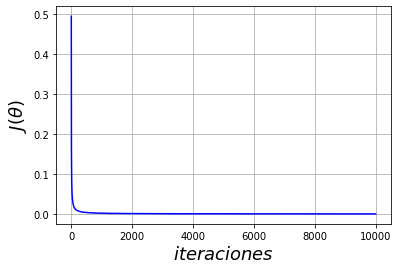

In [18]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [19]:
y_proba_set_AB =np.round(sigmoid(theta_setosa_AB.T @ x_test_AB.T),2)
y_proba_set_AB

array([[0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 1.  , 0.01, 0.  , 0.  ,
        0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 0.  , 0.  , 0.  , 0.  ]])

In [20]:
eta = 0.8
n_iter = 10000
theta_versicolor_AB = np.random.randn(x_train_AB.shape[1]).reshape(x_train_AB.shape[1],1)
y_train_ver_AB = (y_train_AB == 1).astype(int)

theta_versicolor_AB, J_vers = gradiente(theta_versicolor_AB, x_train_AB, y_train_ver_AB)
theta_versicolor_AB

array([[ 5.02337777],
       [ 1.89751424],
       [-3.09965299],
       [ 5.91138586],
       [ 3.79333975]])

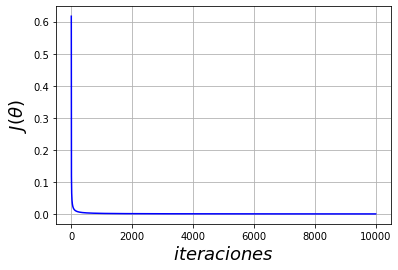

In [21]:
plt.plot(np.arange(n_iter), J_vers, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [22]:
y_proba_ver_AB =np.round(sigmoid(theta_versicolor_AB.T @ x_test_AB.T),2)
y_proba_ver_AB

array([[1.  , 1.  , 0.99, 1.  , 1.  , 1.  , 1.  , 0.  , 0.99, 1.  , 1.  ,
        1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  ,
        1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  ,
        1.  , 1.  , 1.  , 1.  , 1.  ]])

In [23]:
last_data_AB, votar_AB = vector_comparacion(y_proba_set_AB,y_proba_ver_AB, 0 ,1)
last_data_AB

array([[0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.01, 0.99, 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.99, 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  ],
 

In [24]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# AC

## setosa vs  virginica

In [25]:
num_index_x_train_AC = exclude_data(y_train, 1)


In [26]:
x_train_AC = x_train[num_index_x_train_AC]
y_train_AC = y_train[num_index_x_train_AC]


In [27]:
x_train_AC = np.c_[np.ones((len(x_train_AC),1)), x_train_AC]
x_test_AC = np.c_[np.ones((len(x_test),1)), x_test]

In [28]:
x_train_AC.shape

(77, 5)

In [29]:
n_iter = 10000

theta_setosa_AC = np.random.randn(x_train_AC.shape[1]).reshape(x_train_AC.shape[1],1)
y_train_set_AC = (y_train_AC == 0).astype(int)

theta_setosa_AC, J_set = gradiente(theta_setosa_AC, x_train_AC, y_train_set_AC)
theta_setosa_AC

array([[-1.25789803],
       [-2.25419938],
       [ 1.67078736],
       [-2.67089009],
       [-4.25943533]])

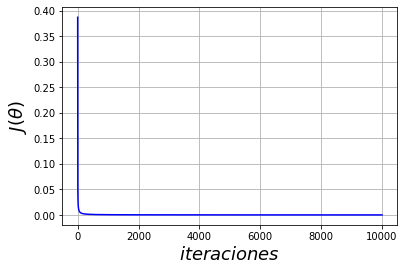

In [30]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [31]:
y_proba_set_AC =np.round(sigmoid(theta_setosa_AC.T @ x_test_AC.T),2)
y_proba_set_AC

array([[0.01, 0.  , 0.65, 0.  , 0.  , 0.  , 0.02, 1.  , 0.58, 0.02, 0.  ,
        0.03, 0.  , 1.  , 0.  , 0.13, 0.  , 0.  , 1.  , 1.  , 0.  , 0.  ,
        0.  , 1.  , 0.04, 0.  , 1.  , 0.  , 0.06, 0.  , 1.  , 0.09, 1.  ,
        0.01, 0.  , 0.1 , 0.01, 0.03]])

In [32]:
eta = 0.8
n_iter = 10000
theta_virginica_AC = np.random.randn(x_train_AC.shape[1]).reshape(x_train_AC.shape[1],1)
y_train_ver_AC = (y_train_AC == 2).astype(int)

theta_virginica_AC, J_vir = gradiente(theta_virginica_AC, x_train_AC, y_train_ver_AC)
theta_virginica_AC

array([[ 1.22497091],
       [ 1.1320504 ],
       [-1.15444513],
       [ 4.94691864],
       [ 2.97273122]])

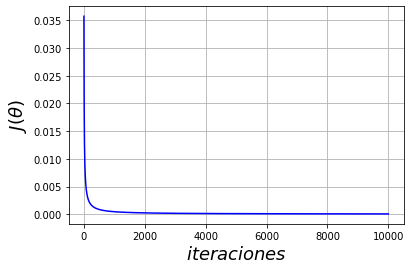

In [33]:
plt.plot(np.arange(n_iter), J_vir, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [34]:
y_proba_vir_AC =np.round(sigmoid(theta_virginica_AC.T @ x_test_AC.T),2)
y_proba_vir_AC

array([[1.  , 1.  , 0.4 , 1.  , 1.  , 1.  , 0.98, 0.  , 0.3 , 0.98, 1.  ,
        0.96, 1.  , 0.  , 1.  , 0.92, 1.  , 1.  , 0.  , 0.  , 1.  , 1.  ,
        1.  , 0.  , 0.96, 1.  , 0.  , 1.  , 0.93, 0.99, 0.  , 0.9 , 0.  ,
        0.98, 1.  , 0.92, 0.99, 0.99]])

In [35]:
last_data_AC, votar_AC = vector_comparacion(y_proba_set_AC,y_proba_vir_AC, 0 ,2)
last_data_AC

array([[0.01, 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.65, 0.4 , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.02, 0.98, 2.  ],
       [1.  , 0.  , 0.  ],
       [0.58, 0.3 , 0.  ],
       [0.02, 0.98, 2.  ],
       [0.  , 1.  , 2.  ],
       [0.03, 0.96, 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.13, 0.92, 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 2.  ],
       [0.06, 0.93, 2.  ],
       [0.  , 0.99, 2.  ],
       [1.  , 0.  , 0.  ],
       [0.09, 0.9 , 2.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.98, 2.  ],
       [0.  , 1.  , 2.  ],
       [0.1 , 0.92, 2.  ],
       [0.01, 0.99, 2.  ],
 

In [36]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# BC

## versicolor vs  virginica

In [37]:
num_index_x_train_BC = exclude_data(y_train, 0)


In [38]:
x_train_BC = x_train[num_index_x_train_BC]
y_train_BC = y_train[num_index_x_train_BC]


In [39]:
x_train_BC = np.c_[np.ones((len(x_train_BC),1)), x_train_BC]
x_test_BC = np.c_[np.ones((len(x_test),1)), x_test]

In [40]:
x_train_BC.shape

(70, 5)

In [41]:
n_iter = 10000

theta_versicolor_BC = np.random.randn(x_train_BC.shape[1]).reshape(x_train_BC.shape[1],1)
y_train_set_BC = (y_train_BC == 1).astype(int)

theta_versicolor_BC, J_set = gradiente(theta_versicolor_BC, x_train_BC, y_train_set_BC)
theta_versicolor_BC

array([[ 18.65877639],
       [  1.10864481],
       [  2.79990791],
       [-13.37552642],
       [-13.15206516]])

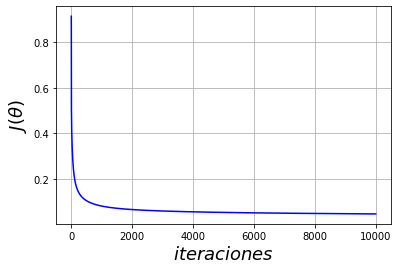

In [42]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [43]:
y_proba_ver_BC =np.round(sigmoid(theta_versicolor_BC.T @ x_test_BC.T),2)
y_proba_ver_BC

array([[0.38, 0.3 , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.39,
        1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.9 , 0.  ,
        0.  , 1.  , 1.  , 0.  , 1.  , 0.1 , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 0.  , 1.  , 1.  , 1.  ]])

In [44]:
n_iter = 10000

theta_virginica_BC = np.random.randn(x_train_BC.shape[1]).reshape(x_train_BC.shape[1],1)
y_train_set_BC = (y_train_BC == 2).astype(int)

theta_virginica_BC, J_set = gradiente(theta_virginica_BC, x_train_BC, y_train_set_BC)
theta_virginica_BC

array([[-18.69345877],
       [ -1.11081249],
       [ -2.80548103],
       [ 13.39713423],
       [ 13.17929582]])

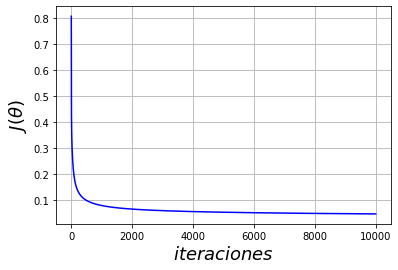

In [45]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [46]:
y_proba_vir_BC =np.round(sigmoid(theta_virginica_BC.T @ x_test_BC.T),2)
y_proba_vir_BC

array([[0.63, 0.7 , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.61,
        0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.1 , 1.  ,
        1.  , 0.  , 0.  , 1.  , 0.  , 0.9 , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1.  , 0.  , 0.  , 0.  ]])

In [47]:
last_data_BC, votar_BC = vector_comparacion(y_proba_ver_BC,y_proba_vir_BC, 1 ,2)
last_data_BC

array([[0.38, 0.63, 2.  ],
       [0.3 , 0.7 , 2.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.39, 0.61, 2.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.9 , 0.1 , 1.  ],
       [0.  , 1.  , 2.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [0.1 , 0.9 , 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
       [0.  , 1.  , 2.  ],
       [1.  , 0.  , 1.  ],
       [1.  , 0.  , 1.  ],
 

In [48]:
votar_AB.T, votar_AC.T, votar_BC.T, y_test.T

(array([[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
         1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]]),
 array([[2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2,
         2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2]]),
 array([[2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2,
         2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]]),
 array([[2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 2, 2,
         2, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1]]))

In [49]:
vote_data = np.concatenate((votar_AB, votar_AC, votar_BC), axis =1)
vote_data

array([[1, 2, 2],
       [1, 2, 2],
       [1, 0, 1],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 1],
       [0, 0, 1],
       [1, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 2],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 1],
       [0, 0, 1],
       [1, 2, 1],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 1],
       [1, 2, 1]])

In [50]:
data = []

for i in range(len(vote_data)):   
    values, votes = np.unique(vote_data[i], return_counts=True)
    index_winner = votes.argmax()
    data.append(values[index_winner])
data = np.array(data)
np.concatenate((data.reshape(len(data), 1), y_test), axis =1)

array([[2, 2],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [2, 2],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [0, 0],
       [1, 2],
       [2, 2],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1]])

In [52]:
cm = confusion_matrix(y_test , data)
cm

array([[ 8,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

In [53]:
actual = 0
total = 0

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            actual = cm[i][j] + actual
        total = cm[i][j] + total
actual / total


0.9736842105263158

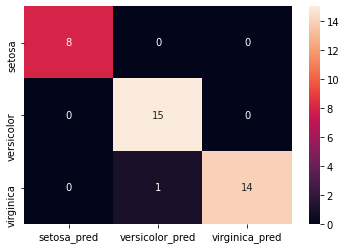

In [54]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
cm = confusion_matrix(y_test , data)
f = sns.heatmap(cm, annot=True,  xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [55]:
print(classification_report(y_test, data, target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.98      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38

